# Seasonal Auto-Regressive Integrated Average Model - SARIMA

Lecture Notebook
Prepared by: Matthew R. Maulion, MSc

Resources: 
- Applied Time Series Analysis, UDEMY
- Machine Learing Mastery, Jason Brown Lee

## Introduction to SARIMA

We just tackled the ARIMA and its implementation. Now let us take a look at SARIMA. It is just an ARIMA with the inclusion of the S which stands for **seasonality**. 



Autoregressive Integrated Moving Average, or ARIMA, is one of the most widely used forecasting methods for univariate time series data forecasting. Although the method can handle data with a trend, it does not support time series with a seasonal component. An extension to ARIMA that supports the direct modeling of the seasonal component of the series is called SARIMA.

In this tutorial, you will discover the Seasonal Autoregressive Integrated Moving Average, or SARIMA, method for time series forecasting with univariate data containing trends and seasonality.

In this lecture, you will specifically know the following:

- The limitations of ARIMA when it comes to seasonal data.
- The SARIMA extension of ARIMA that explicitly models the seasonal element in univariate data.
- How to implement the SARIMA method in Python using the Statsmodels library.

## What is SARIMA?

The recent model we have learned about is the Autoregressive Integrated Moving Average, or ARIMA, is a forecasting method for univariate time series data. As its name suggests, it supports both an autoregressive and moving average elements. The integrated element refers to differencing allowing the method to support time series data with a trend.

A problem with ARIMA is that **it does not support seasonal data**. That is a time series with a repeating cycle. Meaning, regardless of what seasonality your data has, it does not contribute to us getting better predictions because ARIMA does not have anything to do with it at all. Also, as we know, ARIMA expects data that is either not seasonal or has the seasonal component removed, e.g. seasonally adjusted via methods such as seasonal differencing.

Time series data like sales of a gift shop, flight passenger volume, etc. are highly influenced by seasonailty. That's why we need to consider it in doing time series analysis. 

And this is where **SARIMA** comes in. 

**Seasonal Autoregressive Integrated Moving Average**, SARIMA or Seasonal ARIMA as others call it, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component. It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.


As the Forecasting Principles and Practice p. 242 (2013) states:

> A seasonal ARIMA model is formed by including additional seasonal terms in the ARIMA […] The seasonal part of the model consists of terms that are very similar to the non-seasonal components of the model, but they involve backshifts of the seasonal period.

**How to configure the SARIMA model?**

<img src='sarima.PNG' width=700 height=700/>

With ARIMA, we were just configuring it p, d, and q elements for the trend. However, in SARIMA, the seasonality will have its own set of elements P, D, Q and m (season) as well. These are discussed as follows: 

Configuring a SARIMA requires selecting hyperparameters for both the trend and seasonal elements of the series.

**Trend (non-seasonal) Elements**
There are three trend elements that require configuration.

They are the same as the ARIMA model; specifically:

- **p**: Trend autoregression order.
- **d**: Trend difference order.
- **q**: Trend moving average order.

**Seasonal Elements**
There are four seasonal elements that are not part of ARIMA that must be configured; they are:

- **P**: Seasonal autoregressive order.
- **D**: Seasonal difference order.
- **Q**: Seasonal moving average order.
- **m**: The number of time steps for a single seasonal period.

Let us take a look at an example to better understand this concept. 

Consider the SARIMA model below: 

> **SARIMA(3,1,0)(1,1,0)12**

Importantly, the m parameter influences the P, D, and Q parameters. For example, an m of 12 for monthly data suggests a yearly seasonal cycle.

A P=1 would make use of the first seasonally offset observation in the model, e.g. t-(m*1) or t-12. A P=2, would use the last two seasonally offset observations t-(m * 1), t-(m * 2).

Similarly, a D of 1 would calculate a first order seasonal difference and a Q=1 would use a first order errors in the model (e.g. moving average).

From Introductory of Time Series with R, it was stated that: 

> A seasonal ARIMA model uses differencing at a lag equal to the number of seasons (s) to remove additive seasonal effects. As with lag 1 differencing to remove a trend, the lag s differencing introduces a moving average term. The seasonal ARIMA model includes autoregressive and moving average terms at lag s.

## Implementation of the SARIMA model

#### Importing important libraries

In [24]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd

from itertools import product

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [25]:
plt.rcParams['figure.figsize'] = [10, 7.5]

### Diagnosing the Dataset

The dataset we have is the same dataset we worked with the AR (p) and MA (q) lecture. This is the Quarterly Earnings per Share for Johnson&Johnson (J&J). 

In [26]:
data = pd.read_csv('jj.csv')
data.head() #looking at some datapoints of the csv

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


#### Visualizing the Dataset

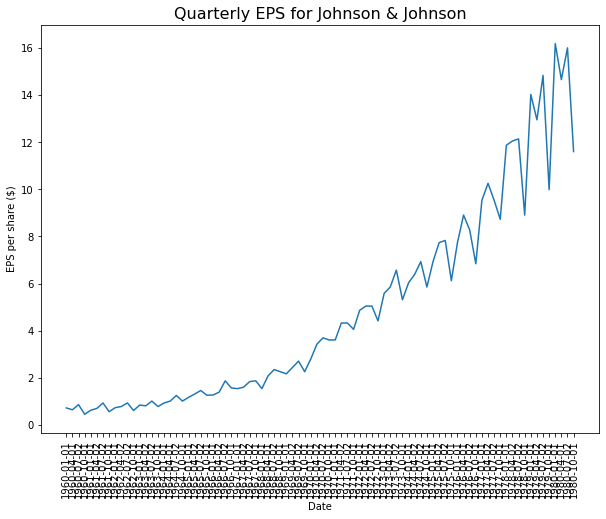

In [27]:
plt.plot(data['date'], data['data'])
plt.title('Quarterly EPS for Johnson & Johnson', size = 16)
plt.ylabel('EPS per share ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

#### Plotting the ACF and PACF of the Dataset

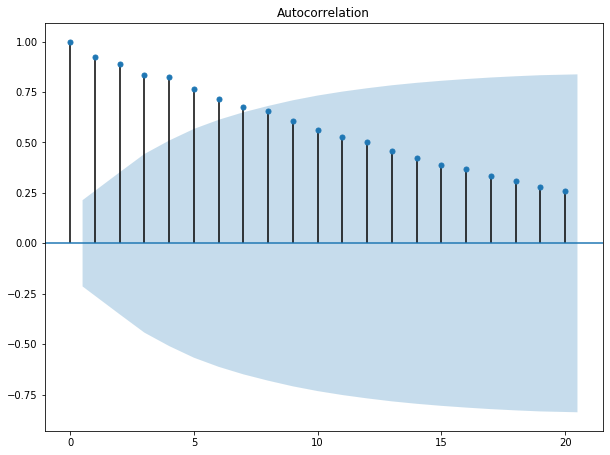

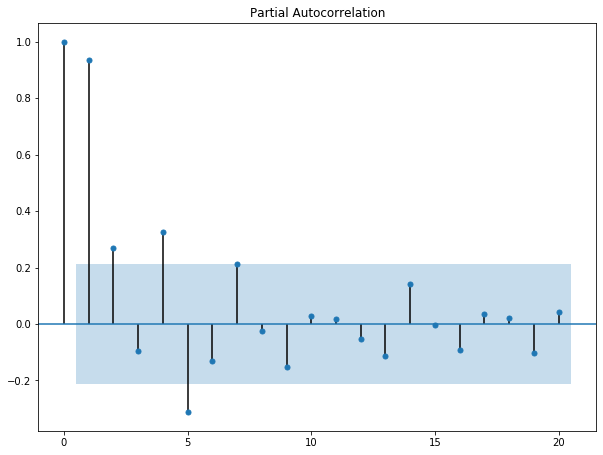

In [28]:
plot_acf(data['data']);
plot_pacf(data['data']);

Review: Why do we need to plot the ACF and PACF of our time series data? 

As a preliminary step, the ACF will tell us if our data stationary or non-stationary. If it is the latter, then we need to apply data transforamtions and that is what we call differencing. 

#### Checking for stationarity using adfuller test

In [29]:
ad_fuller_result = adfuller(data['data'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 2.742016573457473
p-value: 1.0


Given a high ad-fuller score, the dataset is indeed non-stationary which needs differencing. 

#### Differencing using Log differencing

In [30]:
data['data_tr_1'] = np.log(data['data'])
data['data_tr_1'] = data['data_tr_1'].diff()

data.head(10)

,date,data,data_tr_1
0,1960-01-01,0.71,NaN
1,1960-04-01,0.63,-0.119545
2,1960-07-02,0.85,0.299517
3,1960-10-01,0.44,-0.658462
4,1961-01-01,0.61,0.326684
5,1961-04-02,0.69,0.123233
6,1961-07-02,0.92,0.287682
7,1961-10-01,0.55,-0.514455
8,1962-01-01,0.72,0.269333
9,1962-04-02,0.77,0.067139


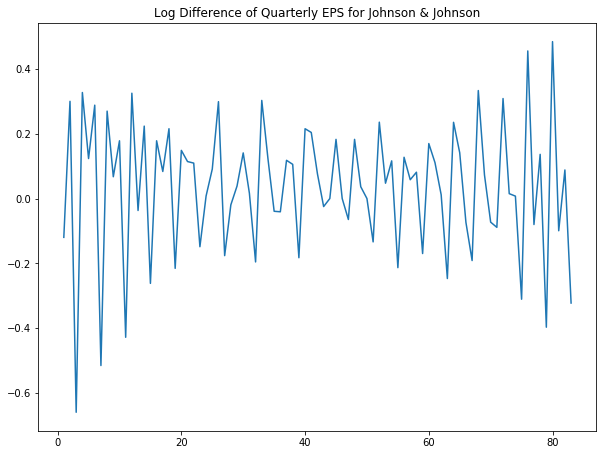

In [31]:
plt.plot(data['data_tr_1'])
plt.title("Log Difference of Quarterly EPS for Johnson & Johnson")
plt.show()

As we can see, the variance of our dataset looks stable and no evident seasons and trends can be observed. Hence, we are successful in differencing. 

#### Checking for stationarity using adfuller test

In [32]:
ad_fuller_result = adfuller(data['data_tr_1'][1:])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -4.317043945811827
p-value: 0.0004149731404440817


Since the p-value is less than 0.05, we can say that indeed our dataset is now stationary and ready for modeling.

#### Plotting the ACF and PACF of the Dataset

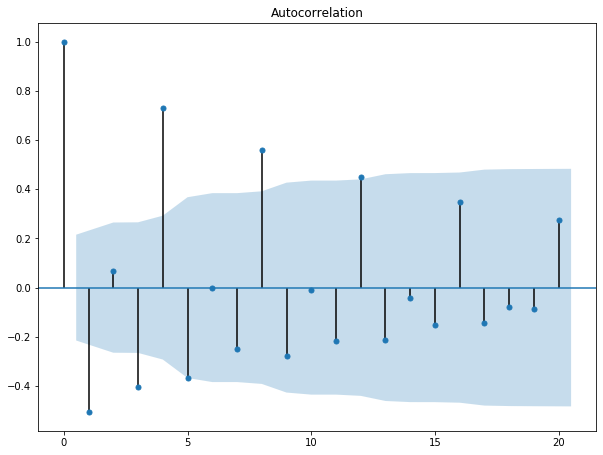

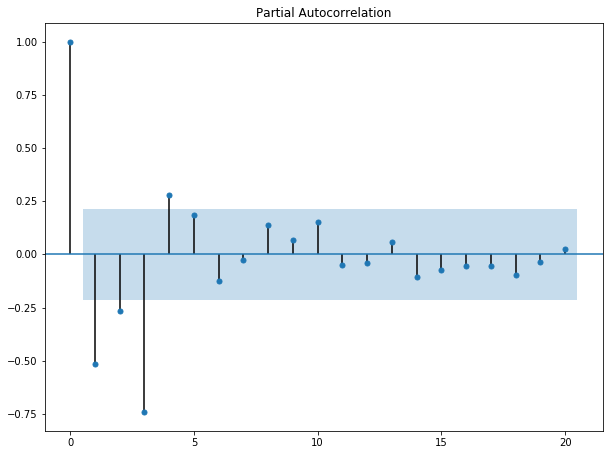

In [10]:
plot_acf(data['data_tr_1'][1:]);
plot_pacf(data['data_tr_1'][1:]);

However, when we view the ACF and PACF plot, there is no clear cut order that we can choose because both exhibit sinusoidal behavior which blurs our understanding in choosing the appropriate order of for AR (p) and MA (q). Therefore, it conclusive to say that generating ACF and PACF plots would be less contributing in ARIMA analysis. 

#### Transforming it even more to consider seasonality

Since this is of quarterly observations, we are goinf too difference it into 4. See code below: 

In [33]:
data['data_tr_2'] = data['data_tr_1'][1:].diff(4)
data.head(15)

,date,data,data_tr_1,data_tr_2
0,1960-01-01,0.71,NaN,NaN
1,1960-04-01,0.63,-0.119545,NaN
2,1960-07-02,0.85,0.299517,NaN
3,1960-10-01,0.44,-0.658462,NaN
4,1961-01-01,0.61,0.326684,NaN
5,1961-04-02,0.69,0.123233,0.242778
6,1961-07-02,0.92,0.287682,-0.011834
7,1961-10-01,0.55,-0.514455,0.144006
8,1962-01-01,0.72,0.269333,-0.057351
9,1962-04-02,0.77,0.067139,-0.056093


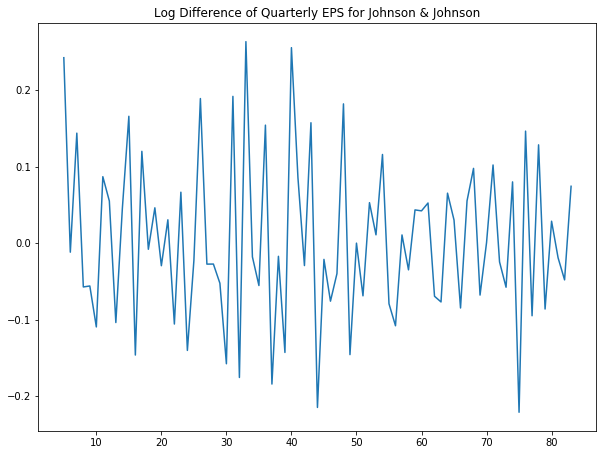

In [34]:
plt.plot(data['data_tr_2'])
plt.title("Log Difference of Quarterly EPS for Johnson & Johnson")
plt.show()

#### Checking for stationarity using adfuller test

In [35]:
ad_fuller_result = adfuller(data['data_tr_2'][5:])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -6.630805109914266
p-value: 5.721578695136168e-09


As you can see, the p-value was even more lowered. This means that our dataset is now indeed stationary so we can proceed to modelling. 

#### Plotting the ACF and PACF of the Dataset

Exclude the first 5 datapoints since it is NaN. 

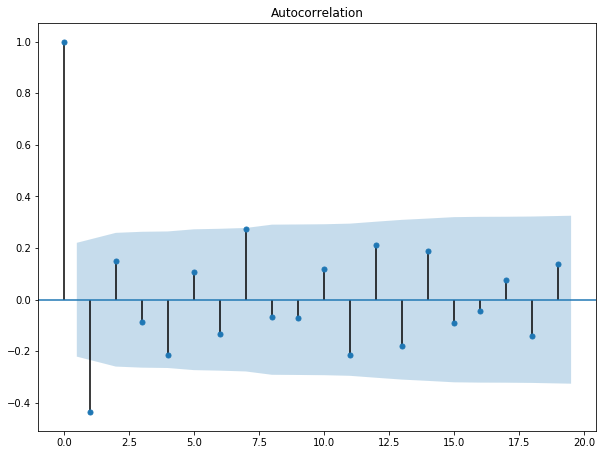

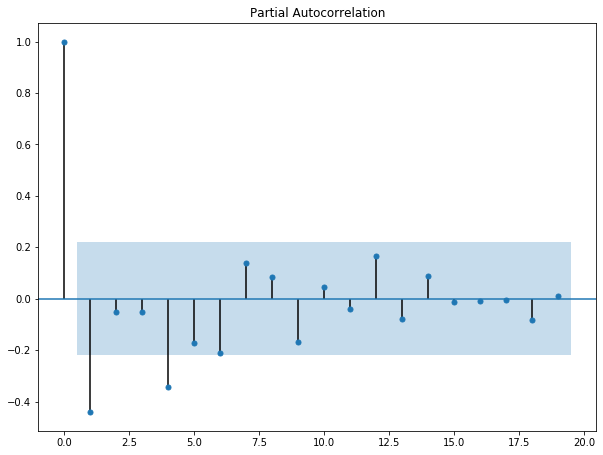

In [36]:
plot_acf(data['data_tr_2'][5:]);
plot_pacf(data['data_tr_2'][5:]);

Similar to ARIMA,when we view the ACF and PACF plot, there is no clear cut order that we can choose because both exhibit sinusoidal behavior which blurs our understanding in choosing the appropriate order of for AR (p) and MA (q). So much more for the seasonal components as well. Therefore, it conclusive to say that generating ACF and PACF plots would also be less contributing in SARIMA analysis. 

## How do we then do SARIMA Modeling?

### The Akakie's Information Criterion

Since ACF and PACF pots also bear little information in doing SARIMA analysis, we will evaluate a set of orders and pick the best one using a criteria. This crietria is named the Akakie's Information Criterion (AIC)  

- It is used to select the best order (p,q) trend components and (P, Q) seasonal components as well. 
 
The mathematical explanation for AIC is presented below: 

<img src='aic.PNG' width=400 height=400 />

where
- L : Likelihood of the data
- k L number of parameters

#### What AIC to choose the best model?

- Select the model with the **lowest AIC** compared to other models 

**Assumption in using AIC**

- Note that the AIC canno tbe used to selct the prder of differenciing (d) becuase it will change the likelihood (L). Hence, we can only compare AIC with a constant differencing value (d) in SARIMA analysis. 

### Finding the optimal SARIMA Model

We will be creating a function that will give us the best ARIMA model from a set of pre-defined orders for p, d, and q. We will name this function `optimize_SARIMA`. 

Look at how the function works below: 

In [37]:
def optimize_SARIMA(endog, parameters_list, d, D, s):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        endog - the observed variable
    """
    
    #list that will contain the results of every ARIMA model (p,d,q)
    results = []
    
    #tqdm is a timer and progress bar (for any programmer's sanity)
    #this loop will create the 
    for param in tqdm_notebook(parameters_list):
        
        # will create a model based on provided `order_list`
        try: 
            model = SARIMAX(endog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s), simple_differencing=False).fit(disp=False)
        
        #will just continue if it encounters an error (a try clause is always paired with except)
        except:
            continue
        
        #calculates the aic value of the model
        aic = model.aic
        
        #appends a list containing the order with its respective aic value
        results.append([param, aic])
    
    #converts the `results` list into a dataframe
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    #returns the summary df containing all the salient information
    return result_df

#### Setting up the set of values to consider for `optimize_ARIMA`

In [16]:
#p values to test
p = range(0, 4, 1)

#constant differencing value d
d = 1

#q values to test
q = range(0, 4, 1)

#P values to test
P = range(0, 4, 1)

#constant differencing value d
D = 1

#Q values to test
Q = range(0, 4, 1)

# Create a list with all possible combination of parameters
parameters = product(p, q, P, Q) #the product function will create all possible combinations of p and q to evaluate
parameters_list = list(parameters)


#display the first ten values in the order list
print(len(parameters_list))
print(parameters_list[:10])

256
[(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 0, 2), (0, 0, 0, 3), (0, 0, 1, 0), (0, 0, 1, 1), (0, 0, 1, 2), (0, 0, 1, 3), (0, 0, 2, 0), (0, 0, 2, 1)]


#### Running the Function

You will see a progress bar below to let know what iteration it is currently running in the for loop in the function.

In [38]:
result_df = optimize_SARIMA(data['data'], parameters_list, d, D, 4)
result_df

,"(p,q)x(P,Q)",AIC
0,"(2, 3, 0, 0)",92.586438
1,"(3, 2, 1, 1)",93.386058
2,"(2, 3, 1, 0)",93.977164
3,"(3, 2, 0, 3)",94.029219
4,"(2, 3, 0, 1)",94.131899
...,...,...
251,"(0, 0, 3, 1)",144.211575
252,"(0, 0, 3, 3)",145.086467
253,"(0, 0, 2, 3)",145.465206
254,"(0, 0, 3, 2)",145.563923


#### Creating your Optimal ARIMA Model

Again, the best model will be one with the lowest AIC score. Use the parameters of the model in creating your optimal model below:

In [39]:
best_model = SARIMAX(data['data'], order=(2,1,3), seasonal_order=(0,1,0,4), simple_differencing=False)
res = best_model.fit(disp=False)
print(res.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               data   No. Observations:                   84
Model:             SARIMAX(2, 1, 3)x(0, 1, [], 4)   Log Likelihood                 -40.293
Date:                            Wed, 24 Nov 2021   AIC                             92.586
Time:                                    11:55:51   BIC                            106.803
Sample:                                         0   HQIC                            98.282
                                             - 84                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4845      0.116    -12.796      0.000      -1.712      -1.257
ar.L2         -0.7900      0.131   

There are evident varibales that are not significant and we can do away with them mocing forward. 

#### Model Diagnostics (Residual Report)

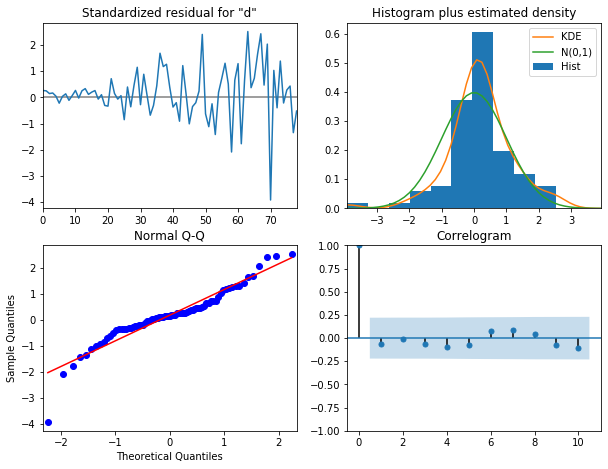

In [19]:
res.plot_diagnostics();

As can be observed, the histogram and qq-plot is telling us that our residuals approaucing a normal distrbution which is the desired behavior in a time series analysis. Therefore, we can now move forward in making our predictions. 

## Making our Predictions

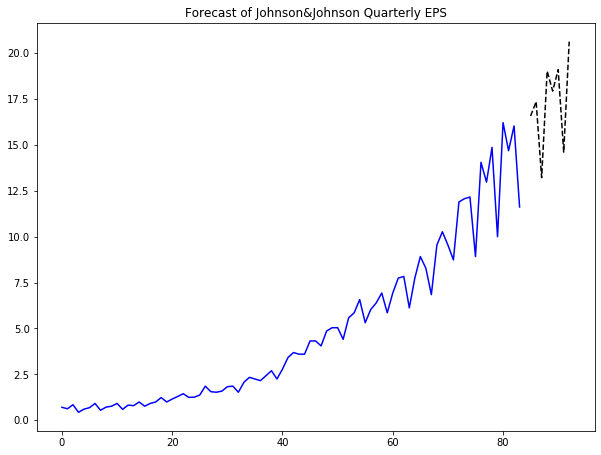

In [40]:
n_forecast = 8 #Forcasting period
predict = res.get_prediction(end=best_model.nobs + n_forecast)
idx = np.arange(len(predict.predicted_mean))

fig, ax = plt.subplots()
ax.plot(data['data'], 'blue')
ax.plot(idx[-n_forecast:], predict.predicted_mean[-n_forecast:], 'k--')

ax.set(title='Forecast of Johnson&Johnson Quarterly EPS')
plt.show()

### Making the dataframe of predictions

In [41]:
data['model'] = predict.predicted_mean
data.head(15)

,date,data,data_tr_1,data_tr_2,model
0,1960-01-01,0.71,NaN,NaN,0.000000
1,1960-04-01,0.63,-0.119545,NaN,0.710000
2,1960-07-02,0.85,0.299517,NaN,0.630000
3,1960-10-01,0.44,-0.658462,NaN,0.850000
4,1961-01-01,0.61,0.326684,NaN,0.795000
5,1961-04-02,0.69,0.123233,0.242778,0.530000
6,1961-07-02,0.92,0.287682,-0.011834,0.804957
7,1961-10-01,0.55,-0.514455,0.144006,0.482714
8,1962-01-01,0.72,0.269333,-0.057351,0.645357
9,1962-04-02,0.77,0.067139,-0.056093,0.748624


### Evaluating the model using MSE

In [42]:
mse = mean_squared_error(data['data'], data['model'])
print(f'MSE: {mse}')

MSE: 0.15612463441231877


### Plotting Predictions against historical data

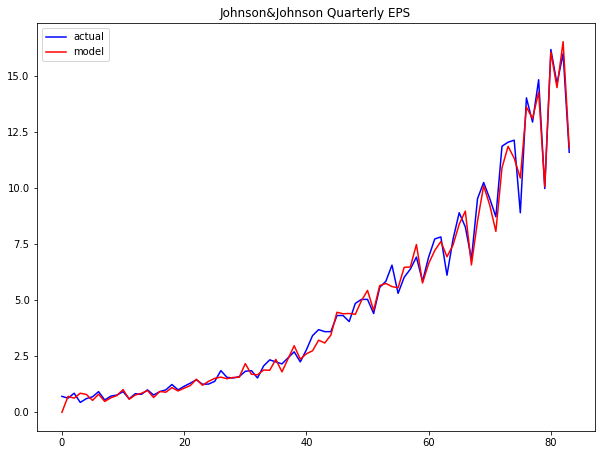

In [43]:
plt.plot(data['data'], color='blue', label='actual')
plt.plot(data['model'], color='red', label='model')
plt.legend(loc='best')
plt.title('Johnson&Johnson Quarterly EPS')
plt.show()

Again, in time series analysis, the lower the error values the better the model. And a metric that will be used should be relevant and appropriate to the study at hand. 

## Individual Assignment: 

Document your code properly and satisfy the following conditions:

1. Create an SARIMA model in predicting the **Monthly Mean Total Sunspot Number** from the `Sunspots.csv` dataset provided in this same repository. 
2. Just use the most recent 5 years of data. 
3. Find the optimal SARIMA model from the following set of p, d, q values: 
> p: from 0 to 10 <br>
> d: d = 1 <br>
> q: from 0 to 10 <br>
> P: from 0 to 10 <br>
> D: d = 1 <br>
> Q: from 0 to 10

4. Predict the next 2 years of data (24 months). Plot the predictions together with the historical data
5. Evaluate the performance of the model using RMSE. 